There are two major intermidiate steps when solving chess problem:
1. Move Chess:

>> Objective: find the shortest path between 2 spots on a chess board

>> Motivation: Move Chess effectively

2. Capture Chess

>> Objective: capture as many pieces from the opponent within centain fullmoves

>> Motivation: Piece captures as one way of reward.


Today we focus on Move chess

# Load and Import Package

In [2]:
!pip install --upgrade git+https://github.com/arjangroen/RLC.git 
!pip install python-chess  
# Python-Chess is the Python Chess Package that handles the chess environment

  Cloning https://github.com/arjangroen/RLC.git to /tmp/pip-req-build-u7g1jefp
  Running command git clone -q https://github.com/arjangroen/RLC.git /tmp/pip-req-build-u7g1jefp
  Created wheel for RLC: filename=RLC-0.3-cp36-none-any.whl size=22566 sha256=d4eb5b2ed6b404045587d645d244e05e1a0ca0cf8c1a281c66945cc0d458305a
  Stored in directory: /tmp/pip-ephem-wheel-cache-f7gpgwif/wheels/04/68/a5/cb835cd3d76a49de696a942739c71a56bfe66d0d8ea7b4b446
Successfully built RLC


In [3]:
from RLC.move_chess.environment import Board
from RLC.move_chess.agent import Piece
from RLC.move_chess.learn import Reinforce
import inspect
import numpy as np

In [23]:
p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
env = Board() # 8*8 chess board
r = Reinforce(p,env) 
r.policy_iteration()



______iteration: 1 ______

 policy:
[['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑'],
 ['↑', '↑', '↑', '↑', '↑', 'F', '↑', '↑']]

Value function for this policy:
[[-9 -9 -9 -9 -9 -9 -9 -9]
 [-9 -9 -9 -9 -9 -9 -9 -9]
 [-9 -9 -9 -9 -9 -9 -9 -9]
 [-9 -9 -9 -9 -9 -9 -9 -9]
 [-9 -9 -9 -9 -9 -9 -9 -9]
 [-9 -9 -9 -8 -8 -8 -8 -8]
 [-9 -9 -9 -8 -7 -7 -7 -8]
 [-9 -9 -9 -8 -7  0 -6 -8]]

 Improving policy:
policy diff: False


______iteration: 2 ______

 policy:
[['↘', '↘', '↘', '↘', '↘', '↘', '↓', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↓', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↓', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↘', '↓', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↓', '↙', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↓', '↙', '↙'],
 ['↘', '↘', '↘', '↘', '↘', '↓', '

# Choose optimal hyperparameters for Policy Iteration Model

There are four hyperparameters: 

eps = [0,1]; exploration rate
gamma=[0,1]; discount factor
k = positive integer; maximum amount of policy evaluation iterations
synchronous: Boolean; whether to use synchronous are asynchronous back-ups 

In this case, we use king as the agent to evaluate minimal number of steps it takes from (0,0) to (5, 7), The true minimal step is 8. Here is the line chart of estimiate minial steps vs hyperparameters value.



In [ ]:
# Eps 
eps_evaluation = dict()
eps = [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001]

for e in eps:
  total_steps = [] # number of step to get to desired position
  for i in range(1):
    p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
    env = Board() # 8*8 chess board
    r = Reinforce(p,env) 
    r.policy_iteration(eps = e)
    states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
    total_steps.append(len(actions))
  eps_evaluation[e] = np.mean(total_steps)

In [ ]:
eps_evaluation

{0.0001: 10.0, 0.001: 8.0, 0.01: 11.0, 0.1: 8.0, 0.2: 11.0, 0.3: 8.0}

In [ ]:
gamma_evaluation = dict()
gamma= [0.99, 0.95, 0.9, 0.8, 0.7]


for g in gamma:
  total_steps = [] # number of step to get to desired position
  for i in range(50):
    p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
    env = Board() # 8*8 chess board
    r = Reinforce(p,env) 
    r.policy_iteration(gamma = g)
    states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
    total_steps.append(len(actions))
  gamma_evaluation[g] = np.mean(total_steps)

In [ ]:
gamma_evaluation

{0.7: 8.96, 0.8: 9.0, 0.9: 8.9, 0.95: 8.96, 0.99: 9.02}

In [ ]:
k_evaluation = dict()
ks= list(range(1, 45, 5))

for k in ks:
  total_steps = [] # number of step to get to desired position
  for i in range(50):
    p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
    env = Board() # 8*8 chess board
    r = Reinforce(p,env) 
    r.policy_iteration(k = k)
    states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
    total_steps.append(len(actions))
  k_evaluation[k] = np.mean(total_steps)

In [ ]:
k_evaluation

{1: 9.08,
 6: 8.92,
 11: 8.82,
 16: 9.12,
 21: 8.68,
 26: 9.12,
 31: 9.16,
 36: 8.74,
 41: 8.86}

In [ ]:
synchronous_evaluation = dict()
synchronous= [True, False]

for s in synchronous:
  total_steps = [] # number of step to get to desired position
  for i in range(50):
    p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
    env = Board() # 8*8 chess board
    r = Reinforce(p,env) 
    r.policy_iteration(synchronous = s)
    states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
    total_steps.append(len(actions))
  synchronous_evaluation[s] = np.mean(total_steps)

In [ ]:
synchronous_evaluation

{False: 9.24, True: 9.0}

[Text(0, 0.5, 'NO. of Min Steps')]

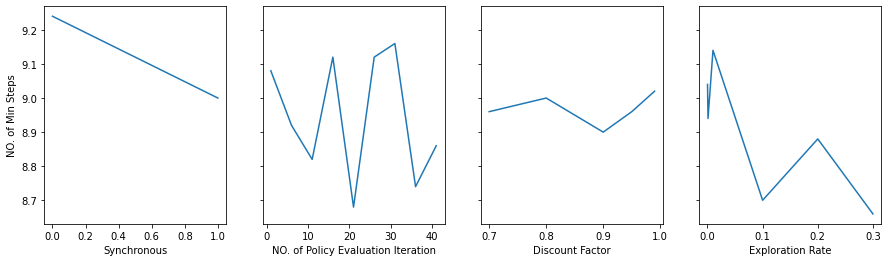

In [ ]:

import matplotlib.pyplot as plt
synchronous = list(synchronous_evaluation.keys())          
min_steps1 = list(synchronous_evaluation.values())

k = list(k_evaluation.keys())          
min_steps2 = list(k_evaluation.values()) 

gamma = list(gamma_evaluation.keys())          
min_steps3 = list(gamma_evaluation.values()) 

eps = list(eps_evaluation.keys())          
min_steps4 = list(eps_evaluation.values()) 



fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=False, sharey=True,)
ax1.plot(synchronous,min_steps1)
ax2.plot(k,min_steps2)
ax3.plot(gamma,min_steps3)
ax4.plot(eps,min_steps4)
fig.set_figwidth(15)
plt.setp([ax1], xlabel='Synchronous')
plt.setp([ax2], xlabel='NO. of Policy Evaluation Iteration')
plt.setp([ax3], xlabel='Discount Factor')
plt.setp([ax4], xlabel='Exploration Rate')
plt.setp([ax1], ylabel='NO. of Min Steps')

In [ ]:
total_steps = []
for i in range(1000):
    p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
    env = Board() # 8*8 chess board
    r = Reinforce(p,env) 
    r.policy_iteration()
    states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
    total_steps.append(len(actions))



In [ ]:
len(total_steps)

1000

Text(0.5, 0, 'NO. of Steps')

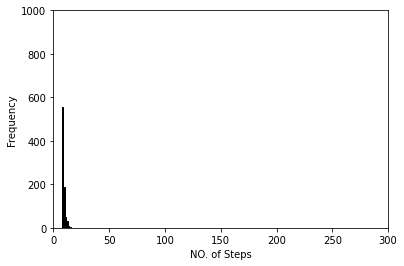

In [ ]:
plt.hist(total_steps, color = 'blue', edgecolor = 'black')
plt.setp([ax1], ylabel='NO. of Min Steps')
plt.ylim(0, 1000) 
plt.xlim(0, 300)
plt.ylabel('Frequency')
plt.xlabel('NO. of Steps')